___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.iartificial.net/wp-content/uploads/2020/01/clustering-compresion-datos.webp" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Clustering</font>

### K-Means

Pasos

1. Seleccionar el número de grupos/clusters, "k" que queremos. 

2. Crear los "K" centroides. La manera más fácil es usar las primeras "K" filas del dataset o hacer una selección random. 

3. Estos centroides no están optimizados. El entrenamiento implica mover los centroides hasta que estén en el centro de cada grupo. En este punto podemos determinar en qué grupo debería estar un punto de datos dado (el centroide al que está más cercano).
Con nuestros centroides iniciales, iteramos a través de los datos agrupando cada punto hasta el centroide al que está más cercano. Luego, cambiamos los centroides tomando el promedio de todos los puntos de datos en cada grupo.

4. El proceso se repite hasta que los centroides ya no cambien tanto. 

#### Ejemplo 1 from scratch

In [1]:
import numpy as np

#Crear datos
data = np.array([  
    [4, 3], [0, 0], [2, 4], [3, 4], [5, 4], [-2, 1], [-3, 0], [-3, -3], [8, 12], [11, 11], [9, 10]  
])
data

array([[ 4,  3],
       [ 0,  0],
       [ 2,  4],
       [ 3,  4],
       [ 5,  4],
       [-2,  1],
       [-3,  0],
       [-3, -3],
       [ 8, 12],
       [11, 11],
       [ 9, 10]])

In [2]:
#Graficar datos
import matplotlib.pyplot as plt


In [3]:
#Selecionar número de K
K = 3  
tol = 0.001  
max_iter = 25

#Inicializar los centroides tomando los primeros "k" datos
centroids = {}  
for i in range(K):  
    centroids[i] = data[i] 
    
groups = {}  
for i in range(max_iter):  
    # Paso 1  
    for j in range(K):  
        groups[j] = [] #Inicializar los grupos con K matrices vacías.
        #Esto asegura que los grupos estén vacíos al comienzo de cada iteración.

    # Paso 2  
    for feature_set in data:  
        #Iterar los datos, calcular distancia euclidiana con respecto a los centroides 
        distances = [np.linalg.norm(feature_set - centroids[centroid_key]) for centroid_key in centroids]

        #El dato es añadido al grupo del centroide donde está más cercano 
        group = distances.index(min(distances))  
        groups[group].append(feature_set)

    # Guardar los centroides actuales. 
    # Estos van a cambiar pronto pero necesitamos los centroides viejos para ver cuánto cambiaron de la iteración pasada
    old_centroids = dict(centroids)

    # Calcular los nuevos centroides, tomando el promedio de todos los datos que cayeron en cada grupo de centroide 
    for j in range(K):  
        centroids[j] = np.average(groups[j], axis=0)

    # Revisar si el cambio en alguno de los centroides es mayor a 0.001%. Si sí, no se ha optimizado todavía y se repite  
    optimized = True  
    for centroid_key in centroids:  
        old_centroid = old_centroids[centroid_key]  
        new_centroid = centroids[centroid_key]  
        a = np.array(new_centroid - old_centroid)  
        b = np.array(old_centroid)  
        change = np.divide(a, b, out=np.zeros_like(a), where=b!=0)

        if abs(np.sum(change * 100.0)) > tol:  
            optimized = False  
            break  
    if optimized:  
        break   
    

In [4]:
#Grupos
groups

{0: [array([ 8, 12]), array([11, 11]), array([ 9, 10])],
 1: [array([0, 0]), array([-2,  1]), array([-3,  0]), array([-3, -3])],
 2: [array([4, 3]), array([2, 4]), array([3, 4]), array([5, 4])]}

In [5]:
#Centroides
centroids

{0: array([ 9.33333333, 11.        ]),
 1: array([-2. , -0.5]),
 2: array([3.5 , 3.75])}

### Ejemplo 1 con librería


In [6]:
import numpy as np

data = np.array([  
    [4, 3], [0, 0], [2, 4], [3, 4], [5, 4], [-2, 1], [-3, 0], [-3, -3], [8, 12], [11, 11], [9, 10]  
])
data

array([[ 4,  3],
       [ 0,  0],
       [ 2,  4],
       [ 3,  4],
       [ 5,  4],
       [-2,  1],
       [-3,  0],
       [-3, -3],
       [ 8, 12],
       [11, 11],
       [ 9, 10]])

In [7]:
#Inicializar kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(
       init="random",
       n_clusters=3,
       n_init=10,
       max_iter=300,
       random_state=42)

#Entrenar datos
kmeans.fit(data)

KMeans(init='random', n_clusters=3, random_state=42)

In [8]:
#Grupos
y_kmeans = kmeans.fit_predict(data)
y_kmeans

array([1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2])

In [9]:
#centroides
kmeans.cluster_centers_

array([[-2.        , -0.5       ],
       [ 3.5       ,  3.75      ],
       [ 9.33333333, 11.        ]])

C:\Users\omara\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


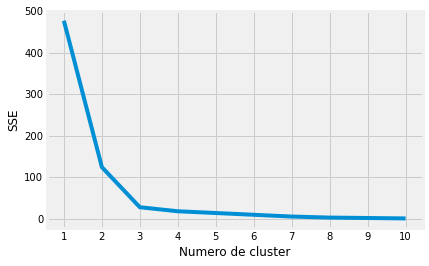

In [10]:
#Elegir número de clusters (k)
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
}

#Calculamos la suma del error cuadrático (SSE) para cada "k" de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
    
#Graficamos
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Numero de cluster")
plt.ylabel("SSE")
plt.show()

In [11]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [12]:
from kneed import KneeLocator
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

#### Ejemplo 2 con librería

<Figure size 432x288 with 0 Axes>

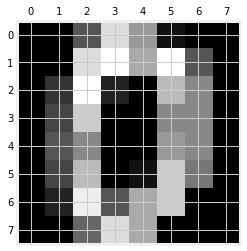

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [14]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [15]:
data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


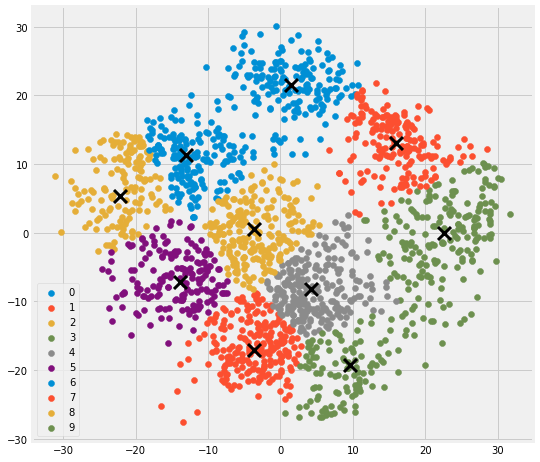

In [17]:
import matplotlib.pyplot as plt

#Reducir la dimensionalidad del dataset
reduced_data = PCA(n_components=2).fit_transform(data) #Aplicamos PCA y reducimos a dos dimensiones
kmeans = KMeans(n_clusters=10, n_init=4)
kmeans.fit(reduced_data)

#Calcular los centroides
centroids = kmeans.cluster_centers_
label = kmeans.fit_predict(reduced_data)
unique_labels = np.unique(label)


# Graficar
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
             color='k',zorder=10)
plt.legend()
plt.show()

In [18]:
#Etiquetas de los datos
kmeans.labels_

array([0, 9, 4, ..., 4, 6, 8])

### Recomendaciones

- Normalización: poner los atributos en escalas similares
- Selección de características/reducción de dimensionalidad: es buena idea usar el menor número atributos posible debido a los que se conoce como la maldición de la dimensionalidad. A que a medida que el número de dimensiones (atributos) aumenta, la distancia discrimina cada vez menos.

#### Alguna bibliografía

Evaluación del modelo
- https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Una guía práctica de clustering:
- https://realpython.com/k-means-clustering-python/


